In [2]:
from cities.queries.causal_insight import CausalInsight

In [3]:
# outcome_dataset= 'industry_transportation_warehousing_total'
# intervention_dataset='spending_transportation'
# forward_shift = 3

ci = CausalInsight(
    #outcome_dataset = 'unemployment_rate',
    #intervention_dataset='spending_commerce'
    #outcome_dataset='gdp',
    #intervention_dataset='spending_HHS'
    outcome_dataset= 'industry_transportation_warehousing_total',
    intervention_dataset='spending_transportation'
    )

ci.load_guide(forward_shift=2)
ci.generate_samples()

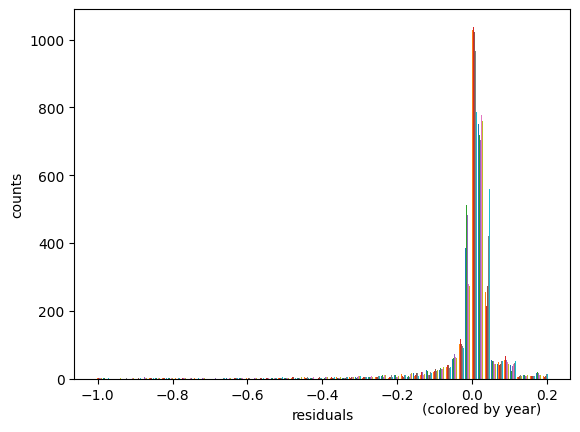

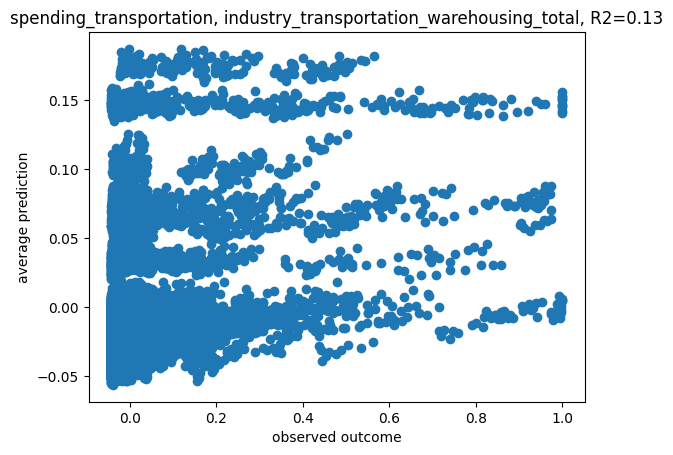

In [4]:
ci.plot_residuals()
ci.predictive_check()

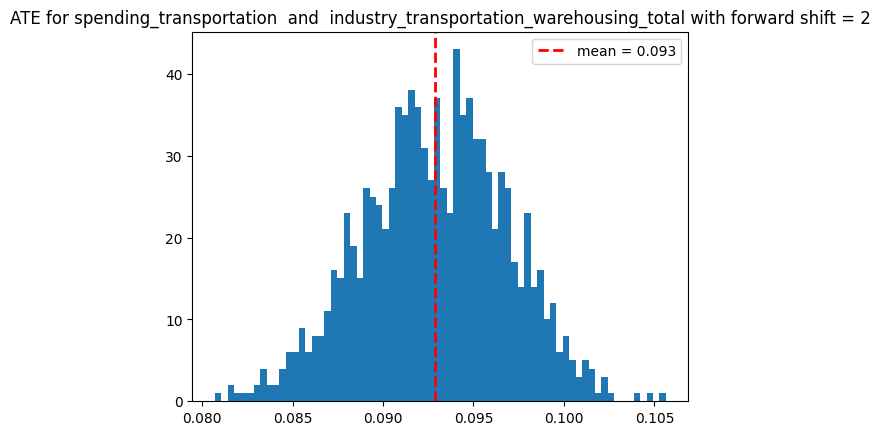

In [ ]:
ci.estimate_ATE()

In [19]:
ci.get_tau_samples()
import torch
torch.is_tensor(ci.tensed_tau_samples[1])
type(ci.tensed_tau_samples[1])
ci.data

{'model_args': (9,
  30,
  51,
  3074,
  tensor([ 0,  0,  0,  ..., 50, 50, 50], dtype=torch.int32),
  tensor([   0,    1,    2,  ..., 3071, 3072, 3073], dtype=torch.int32)),
 'x': tensor([[[[-0.0752, -0.0612, -0.0463,  ...,  0.0053,  0.0831, -0.0833]],
 
          [[ 0.0298, -0.0179, -0.0372,  ..., -0.0708, -0.0336, -0.0492]],
 
          [[ 0.0308,  0.0182, -0.0365,  ...,  0.0266, -0.0365, -0.0365]],
 
          ...,
 
          [[-0.0134, -0.0066, -0.0186,  ..., -0.0202, -0.0207, -0.0208]],
 
          [[-0.0077,  0.0921, -0.0911,  ..., -0.1540, -0.1651, -0.1575]],
 
          [[ 0.0273, -0.0277,  0.0594,  ...,  0.0631,  0.0657,  0.0671]]]]),
 't': tensor([[[[-0.0118, -0.0118, -0.0118,  ..., -0.0118, -0.0118, -0.0118]]],
 
 
         [[[-0.0157, -0.0154, -0.0160,  ..., -0.0162, -0.0163, -0.0162]]],
 
 
         [[[-0.0174, -0.0166, -0.0173,  ..., -0.0173, -0.0173, -0.0171]]],
 
 
         ...,
 
 
         [[[-0.0151, -0.0130, -0.0151,  ..., -0.0150, -0.0150, -0.0149]]],
 
 
        

In [6]:
ci.data['years_available']

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [8]:
ci.get_fips_predictions(intervened_value=.9, fips = 1005)

display(ci.predictions)

8


,year,observed,mean,low,high
2018,2018,-0.033308,-0.033308,-0.033308,-0.033308
2019,2019,-0.034304,0.052460,0.045682,0.058617
2020,2020,-0.035173,0.050033,0.042776,0.057479
2021,2021,-0.034198,0.048427,0.039296,0.057215


In [9]:
ci.plot_predictions(range_multiplier=2)